In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline
import seaborn as sns

In [43]:
df=pd.read_csv('Output_files/Data_pre.csv')

In [44]:
df.head()

,state,sqft,claims,exposure,month,age_bins,freq
0,FL,75772,5,75.772,1,40,0.065987
1,FL,75772,4,75.772,1,40,0.052790
2,AZ,62822,1,62.822,1,20,0.015918
3,AZ,62822,4,62.822,1,20,0.063672
4,AZ,98971,7,98.971,1,90,0.070728


In [45]:
df.describe()

,sqft,claims,exposure,month,age_bins,freq
count,3522.000000,3522.000000,3522.000000,3522.000000,3522.000000,3522.000000
mean,51172.350085,4.344123,51.172350,4.993186,55.388984,0.159725
std,28149.266436,2.525694,28.149266,3.550097,28.010411,0.301882
min,983.000000,1.000000,0.983000,1.000000,0.000000,0.010001
25%,27139.000000,2.000000,27.139000,1.000000,30.000000,0.049965
50%,51921.000000,4.000000,51.921000,5.000000,60.000000,0.084022
75%,75180.250000,6.000000,75.180250,10.000000,80.000000,0.160742
max,99995.000000,18.000000,99.995000,10.000000,100.000000,7.843137


Verify the distribution  in our output varibales Claim and Freq

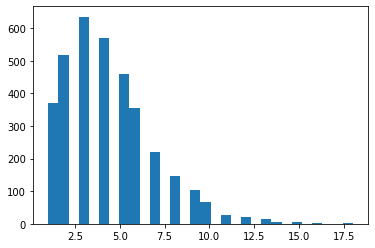

In [46]:
plt.hist(df['claims'],bins=30)
plt.show()

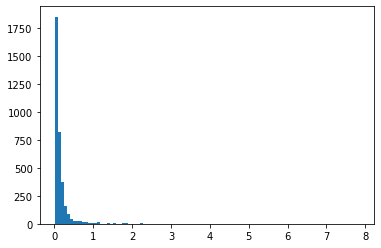

In [47]:
plt.hist(df['freq'],bins=100)
plt.show()

[]

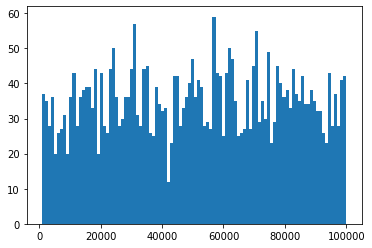

In [48]:
plt.hist(df['sqft'],bins=100)
plt.plot()

C:\Users\Barun\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


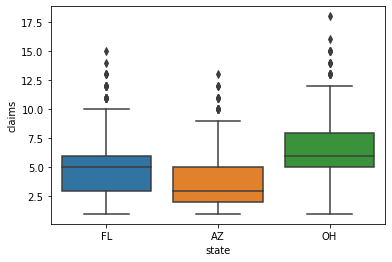

In [49]:
# There is significant pattern between the state and claims
sns.boxplot(df['state'],df['claims'])

In [59]:
df.groupby(["state"])['claims'].mean()

state
AZ    3.679415
FL    4.884030
OH    6.730114
Name: claims, dtype: float64

In [60]:
df.groupby(["state"])['claims'].var()

state
AZ    4.190516
FL    6.526976
OH    9.924105
Name: claims, dtype: float64

There is significant changes in the claims for with repsect to state

C:\Users\Barun\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


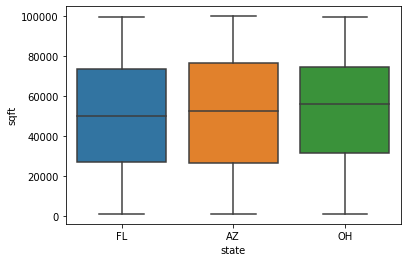

In [50]:
sns.boxplot(df['state'],df['sqft'])

C:\Users\Barun\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


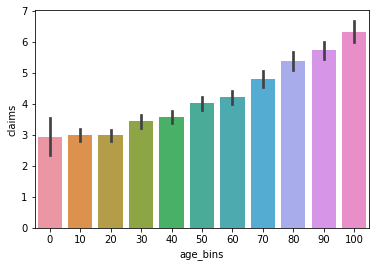

In [68]:
sns.barplot(df['age_bins'],df['claims'])

C:\Users\Barun\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


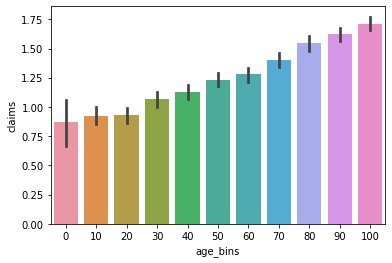

In [52]:
# we see the exp relationhsip between the variables
sns.barplot(df['age_bins'],np.log(df['claims']))

C:\Users\Barun\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


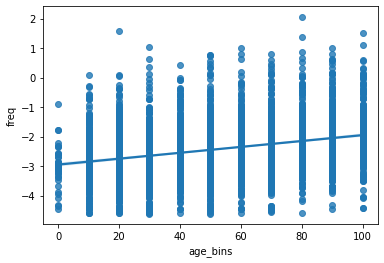

In [53]:
# we see the exp relationhsip between the variables
sns.regplot(df['age_bins'],np.log(df['freq']))

In [54]:
df['log_freq']=np.log(df['freq'])

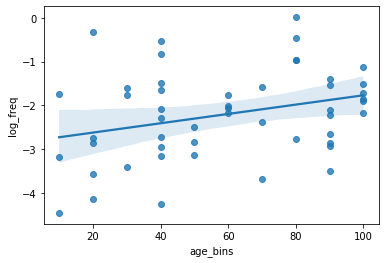

In [55]:

sns.regplot(x = "age_bins", y = "log_freq", data = df[:50])

plt.show()

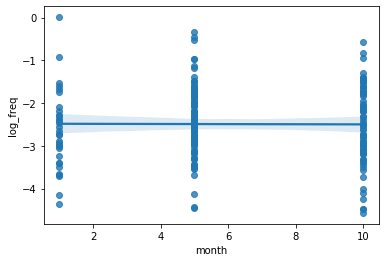

In [56]:
sns.regplot(x = "month", y = "log_freq", data = df[:200])

There is no signifinace change in log_freq with month, so it dosen't look like a imporatt variable 

In [61]:
df.groupby(["month"])['claims'].mean()

month
1     4.348706
5     4.427803
10    4.227642
Name: claims, dtype: float64

In [62]:
df.groupby(["month"])['claims'].var()

month
1     6.581950
5     6.151202
10    6.416082
Name: claims, dtype: float64

In [64]:
df.groupby(["age_bins"])['claims'].mean()

age_bins
0      2.918919
10     2.988722
20     2.979885
30     3.439394
40     3.577713
50     4.009804
60     4.204545
70     4.799511
80     5.375862
90     5.726790
100    6.321875
Name: claims, dtype: float64

In [63]:
df.groupby(["age_bins"])['claims'].var()

age_bins
0      3.576577
10     2.781004
20     2.745992
30     3.699963
40     3.568208
50     4.594498
60     4.613751
70     6.562647
80     7.003568
90     7.236328
100    9.391370
Name: claims, dtype: float64

As age bins increases Variance increases with respect mean

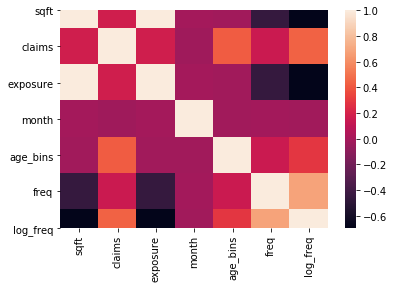

In [69]:
sns.heatmap(df.corr())